In [32]:
import numpy as np 
import pandas as pd
import sklearn as sc
import os
import matplotlib.pyplot as plt
import seaborn as sns

Problem Statement:

1. Perform Data Preprocessing & prepare data for analysis & Modelling

In [33]:
df = pd.read_csv('C:\\Users\91990\Downloads\kidney_disease.csv')
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [34]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [35]:
description = pd.read_csv('C:\\Users\91990\Downloads\Project 2-Chronic Kidney Disease-20220427T121455Z-001\Project 2-Chronic Kidney Disease\data_description.txt', sep = '-')
description = description.reset_index()
description.columns=['Symbol', 'Description']
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [36]:
# rename the abbrevaited column names with full version
df.columns = description['Description'].values
df.info()   # convert string to integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood pressure           388 non-null    float64
 3   specific gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red blood cells          248 non-null    object 
 7    pus cell                335 non-null    object 
 8   pus cell clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood glucose random     356 non-null    float64
 11  blood urea               381 non-null    float64
 12  serum creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [37]:
def convert(df, feature):
    df[feature] = pd.to_numeric(df[feature], errors='coerce')



In [38]:
features = ['packed cell volume', 'white blood cell count' ,  'red blood cell count']
for feature in features:
    convert(df, feature)
    
df.drop('id', axis =1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood pressure           388 non-null    float64
 2   specific gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red blood cells          248 non-null    object 
 6    pus cell                335 non-null    object 
 7   pus cell clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood glucose random     356 non-null    float64
 10  blood urea               381 non-null    float64
 11  serum creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

 Data Cleaning

In [39]:
def extract_columns(df):
    cat_col = [col for col in df.columns if df[col].dtype == 'O']
    num_col = [col for col in df.columns if df[col].dtype != 'O']
    return cat_col, num_col

In [40]:
cat_col, num_col = extract_columns(df)
cat_col 

['red blood cells',
 ' pus cell',
 'pus cell clumps',
 'bacteria',
 'ypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

In [41]:
num_col

['age',
 'blood pressure',
 'specific gravity',
 'albumin',
 'sugar',
 'blood glucose random',
 'blood urea',
 'serum creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed cell volume',
 'white blood cell count',
 'red blood cell count']

In [42]:
for col in cat_col:
    print('{} has values {}'.format(col,df[col].unique()))
    print('\n')

red blood cells has values [nan 'normal' 'abnormal']


 pus cell has values ['normal' 'abnormal' nan]


pus cell clumps has values ['notpresent' 'present' nan]


bacteria has values ['notpresent' 'present' nan]


ypertension has values ['yes' 'no' nan]


diabetes mellitus has values ['yes' 'no' ' yes' '\tno' '\tyes' nan]


coronary artery disease has values ['no' 'yes' '\tno' nan]


appetite has values ['good' 'poor' nan]


pedal edema has values ['no' 'yes' nan]


anemia has values ['no' 'yes' nan]


class has values ['ckd' 'ckd\t' 'notckd']




In [49]:
df['diabetes mellitus'].replace(to_replace={'\tno': 'no', '\tyes': 'yes'},inplace=True)
df['coronary artery disease'].replace(to_replace={'\tno': 'no'},inplace=True)
df['class']=df['class'].replace(to_replace='ckd\t', value= 'ckd')   # chronic kidney disease

In [50]:
for col in cat_col:
    print('{} has values {}'.format(col,df[col].unique()))
    print('\n')
    

red blood cells has values [nan 'normal' 'abnormal']


 pus cell has values ['normal' 'abnormal' nan]


pus cell clumps has values ['notpresent' 'present' nan]


bacteria has values ['notpresent' 'present' nan]


ypertension has values ['yes' 'no' nan]


diabetes mellitus has values ['yes' 'no' ' yes' nan]


coronary artery disease has values ['no' 'yes' nan]


appetite has values ['good' 'poor' nan]


pedal edema has values ['no' 'yes' nan]


anemia has values ['no' 'yes' nan]


class has values ['ckd' 'notckd']




Analysis Distribution of data

In [51]:
len(num_col)

14

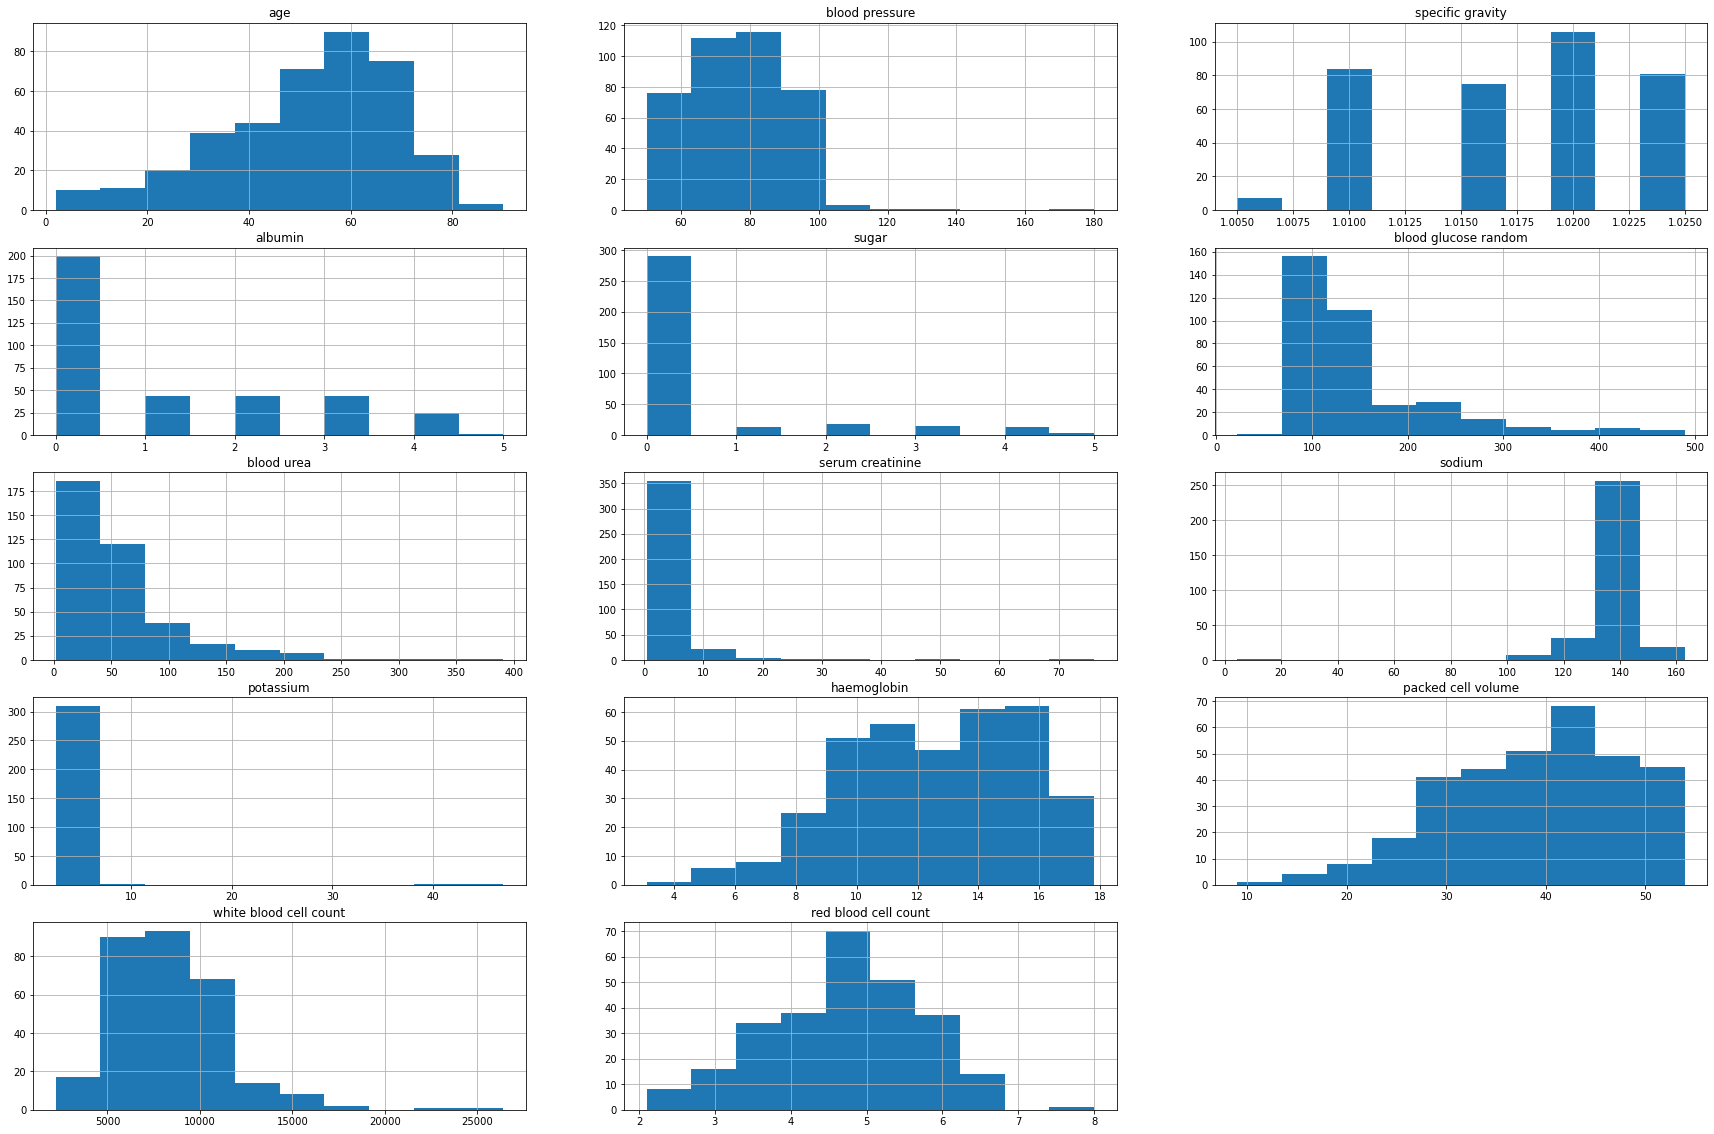

In [53]:
plt.figure(figsize=(30,20))

for i,feature in enumerate(num_col):
    plt.subplot(5,3,i+1)    # 5 rows, 3 columns; review why i+1 video 41
    df[feature].hist()
    plt.title(feature)